In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBRFClassifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [22]:
data=pd.read_csv('../Phase_3_data/Census Income.csv')

In [23]:
data.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
700,31,Private,243605,Bachelors,13,Widowed,Sales,Unmarried,White,Female,0,1380,40,Cuba,<=50K
17313,76,?,84755,Some-college,10,Widowed,?,Unmarried,White,Female,0,0,40,United-States,<=50K
27534,28,Private,83879,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
23589,61,Self-emp-inc,98350,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,Taiwan,>50K
16296,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
23092,23,Private,165064,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
30092,60,Private,250552,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,>50K
21159,36,Private,162424,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
26200,24,Private,179203,12th,8,Never-married,Sales,Other-relative,White,Male,0,0,55,United-States,<=50K
15193,18,State-gov,109445,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K


In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

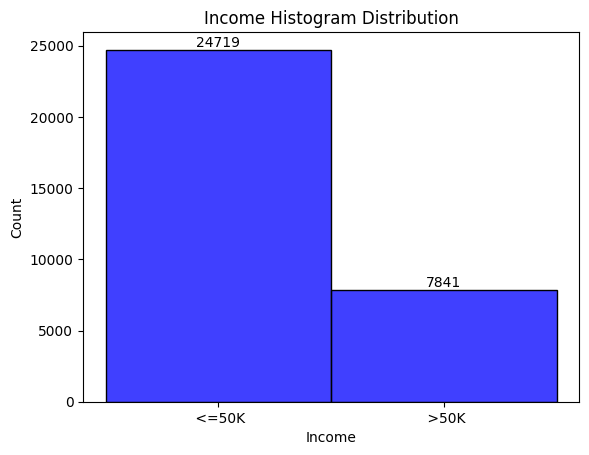

In [27]:
ax = sns.histplot(x=data['Income'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Income')
plt.title('Income Histogram Distribution')
plt.show()

In [28]:
obj_columns=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']


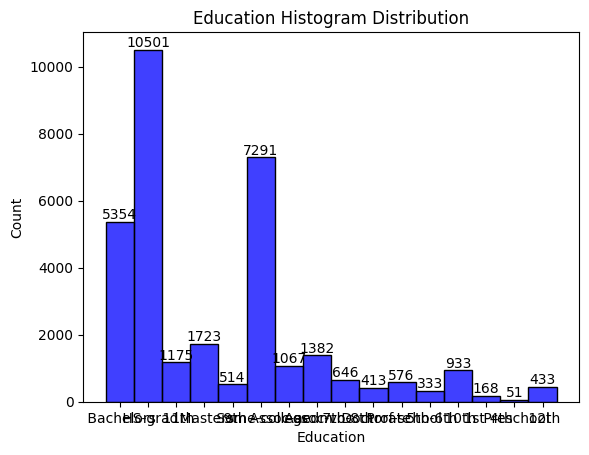

In [29]:
ax = sns.histplot(x=data['Education'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Education')
plt.title('Education Histogram Distribution')
plt.show()


In [30]:
from sklearn.preprocessing import LabelEncoder


object_cols = data.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each object column
for col in object_cols:
    label_encoder = LabelEncoder()

    data[col] = label_encoder.fit_transform(data[col])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [32]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

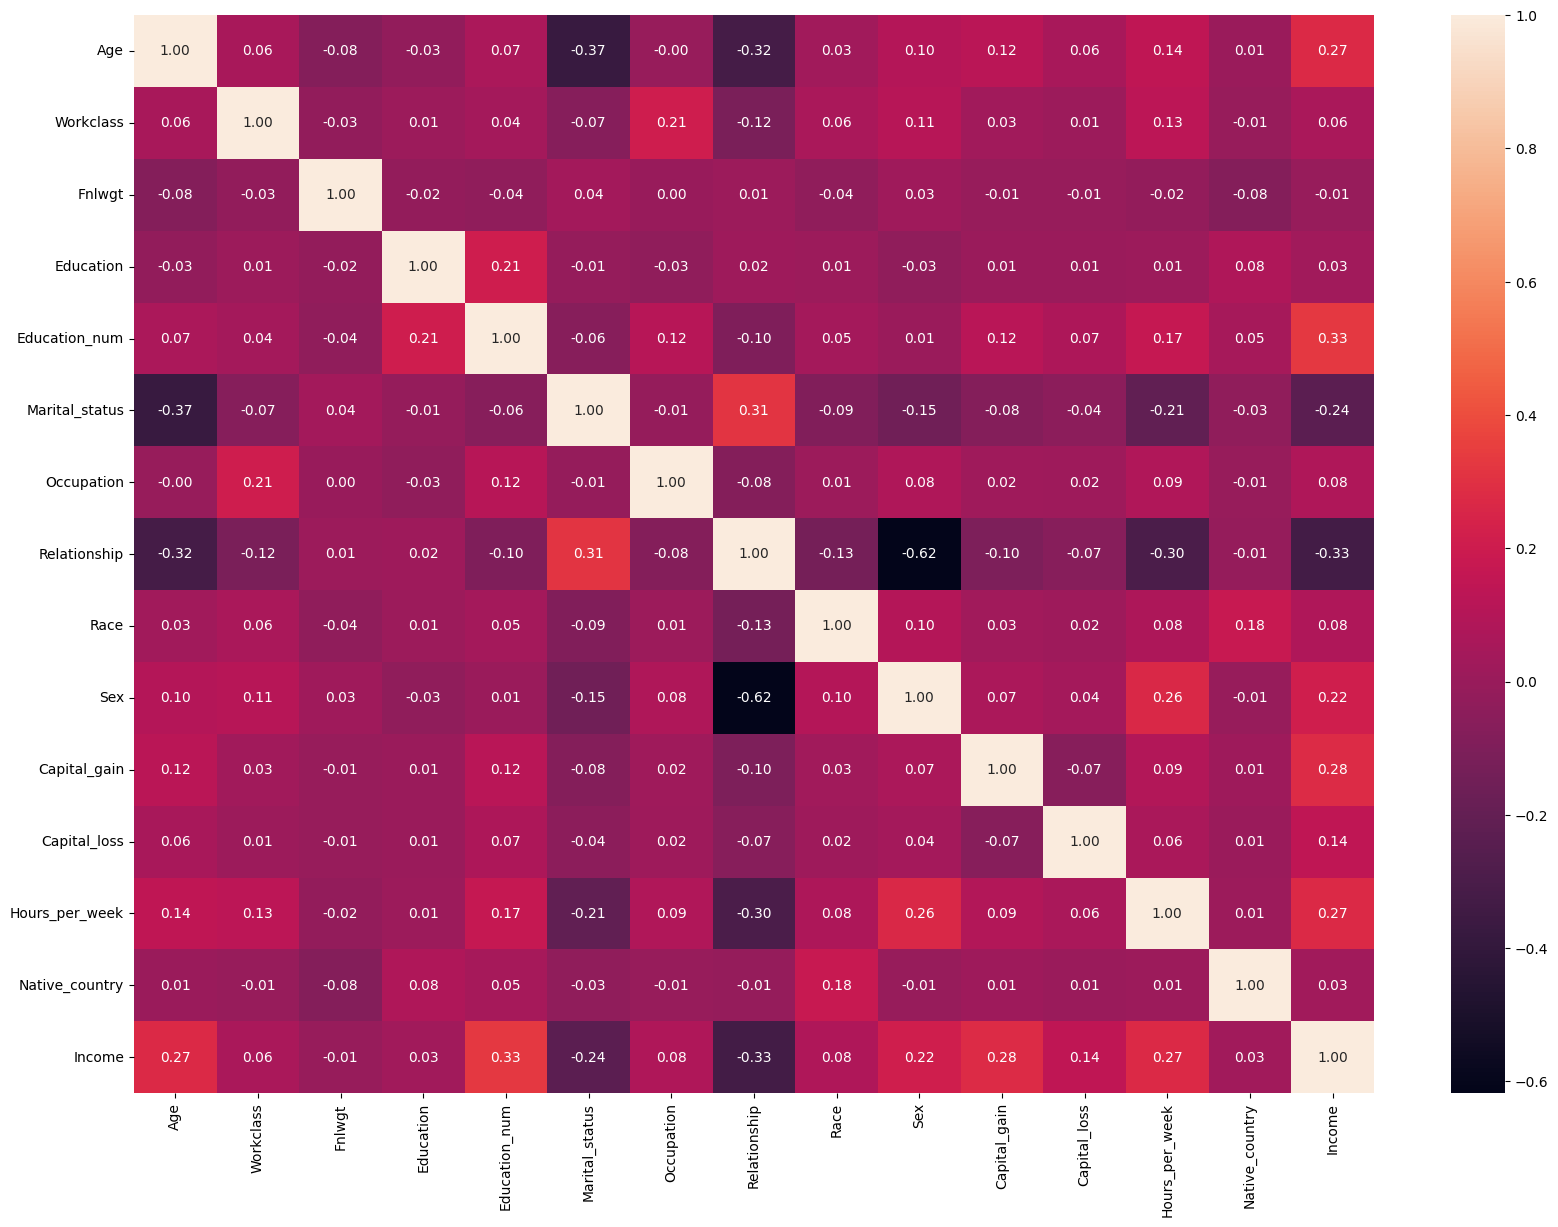

In [33]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(data=data.corr(method='spearman'), annot=True, fmt='.2f')


In [34]:
drop_col = ['Race','Native_country']
data=data.drop(columns=drop_col,axis=1)

In [35]:
data.duplicated().sum()

25

In [36]:
data.drop_duplicates(inplace=True)

In [37]:
X = data.drop('Income', axis = 1)
y = data['Income']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

## Taining a Model

In [38]:
def evaluation_fn(best_model,X_test_scaled,Y_test):
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')
    print('=================================================================================')

    print('Accuracy of the model is:', accuracy)
    print('Precision of the model is:', precision)
    print('Recall of the model is:', recall)
    print('F1 score of the model is:', f1)    

    # ROC curve and AUC
    print('=================================================================================')
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    print('=================================================================================')


Accuracy of the model is: 0.8043645305056093
Precision of the model is: 0.8064664085238137
Recall of the model is: 0.8043645305056093
F1 score of the model is: 0.8053687366244497


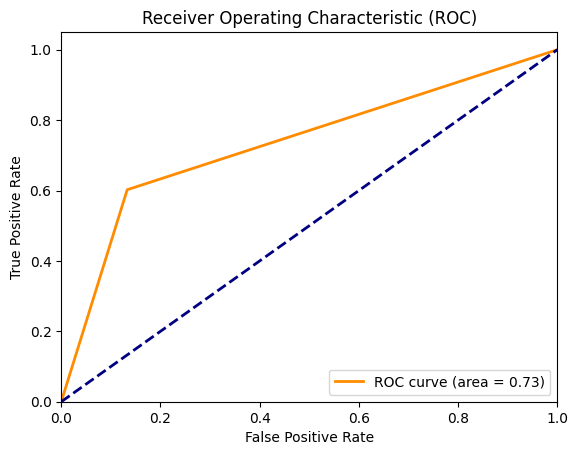

In [39]:
model = DecisionTreeClassifier(random_state=17)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.8558475487936069
Precision of the model is: 0.8505329402314147
Recall of the model is: 0.8558475487936069
F1 score of the model is: 0.8519897119573309


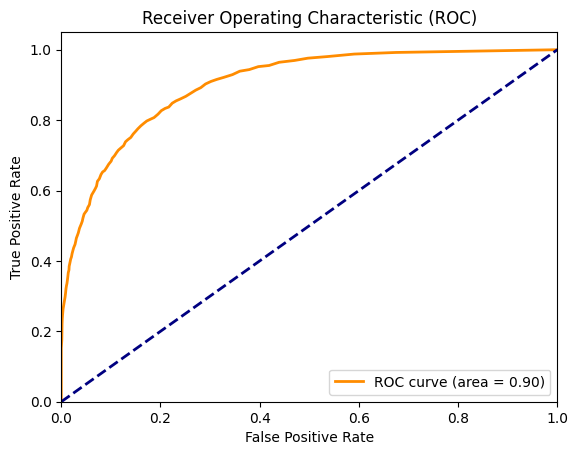

In [40]:
model = RandomForestClassifier(random_state=17)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

In [46]:
# Random Forest Classifier with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=17)
param_grid_rf = {
    'n_estimators': [60,80,100,120,150,200,250],
    'max_depth': [6,7,8,10,12],
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='f1')
grid_search_rf.fit(X_train, Y_train)


In [45]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=80, random_state=17)

Random Forest Classifier:
Accuracy of the model is: 0.863992623328723
Precision of the model is: 0.8581863294855859
Recall of the model is: 0.863992623328723
F1 score of the model is: 0.858003667333651


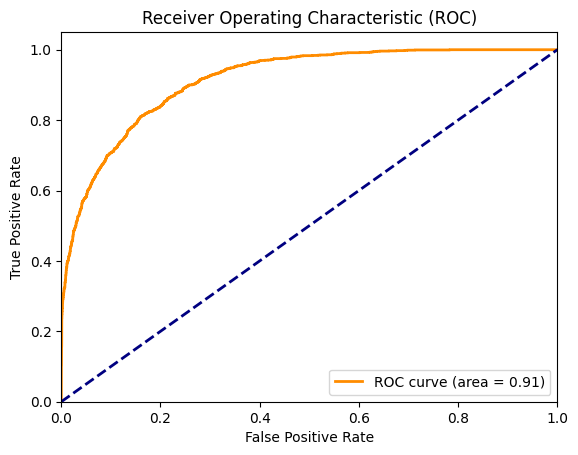

In [44]:
best_rf_model = grid_search_rf.best_estimator_
print("Random Forest Classifier:")
evaluation_fn(best_rf_model, X_test, Y_test)